In [ ]:

import os

# Konfiguration
STREAM_URL = "http://10.108.64.10:5020/api/stream"
IMAGE_SAVE_PATH = "downloaded_images"

# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(IMAGE_SAVE_PATH, exist_ok=True)


def download_image(image_url):
    """Lädt ein Bild von der gegebenen URL herunter und speichert es."""
    try:
        response = requests.get(image_url, stream=True)
        if response.status_code == 200:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S%f")
            filename = os.path.join(IMAGE_SAVE_PATH, f"image_{timestamp}.jpg")
            with open(filename, "wb") as file:
                for chunk in response.iter_content(1024):
                    file.write(chunk)
            print(f"Bild gespeichert: {filename}")
        else:
            print(f"Fehler beim Abrufen des Bildes: {response.status_code}")
    except Exception as e:
        print(f"Fehler beim Herunterladen des Bildes: {e}")


def stream_json():
    """Liest kontinuierlich den JSON-Datenstrom und lädt Bilder herunter."""
    try:
        with requests.get(STREAM_URL, stream=True, timeout=10) as response:
            if response.status_code != 200:
                print(f"Fehler: Server antwortet mit Status {response.status_code}")
                return

            for line in response.iter_lines():
                if not line or not line.strip():
                    continue  # Leere Zeilen überspringen

                try:
                    print(f"Empfangene Zeile: {line}")  # Debugging-Ausgabe
                    data = json.loads(line.decode("utf-8"))
                    image_url = data.get("image_url")

                    if image_url:
                        print(f"Bild-URL empfangen: {image_url}")
                        download_image(image_url)
                    else:
                        print("Keine Bild-URL im JSON gefunden.")

                except json.JSONDecodeError as e:
                    print(f"Fehler beim Dekodieren von JSON: {e}")

    except requests.RequestException as e:
        print(f"Fehler beim Verbinden zum Stream: {e}")


if __name__ == "__main__":
    print("Starte JSON-Stream-Verarbeitung...")
    stream_json()


In [3]:
import requests

STREAM_URL = "http://10.108.64.10:5020/api/stream"

try:
    response = requests.get(STREAM_URL, stream=True, timeout=5)
    print(f"Statuscode: {response.status_code}")

    # Prüfen, ob Daten empfangen werden
    for _ in range(5):
        line = next(response.iter_lines(), None)
        if line:
            print(f"Empfangene Zeile: {line.decode('utf-8')}")
        else:
            print("Keine Daten erhalten.")

except requests.RequestException as e:
    print(f"Fehler beim Verbinden: {e}")


Statuscode: 200
Empfangene Zeile: data: {"index": 45, "timestamp": 1743009399.0314138, "original": "http://10.108.64.10:5020/static/extracted/05_missing_hole_06.jpg", "modified": "http://10.108.64.10:5020/static/modified/05_missing_hole_06.jpg", "filename": "05_missing_hole_06.jpg"}
Keine Daten erhalten.
Fehler beim Verbinden: 


In [4]:

import os

# Konfiguration
STREAM_URL = "http://10.108.64.10:5020/api/stream"
IMAGE_SAVE_PATH = "downloaded_images"

# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(IMAGE_SAVE_PATH, exist_ok=True)


def download_image(image_url, filename):
    """Lädt ein Bild von der gegebenen URL herunter und speichert es."""
    try:
        response = requests.get(image_url, stream=True)
        if response.status_code == 200:
            save_path = os.path.join(IMAGE_SAVE_PATH, filename)
            with open(save_path, "wb") as file:
                for chunk in response.iter_content(1024):
                    file.write(chunk)
            print(f"✅ Bild gespeichert: {save_path}")
        else:
            print(f"⚠️ Fehler beim Abrufen des Bildes: {response.status_code}")
    except Exception as e:
        print(f"❌ Fehler beim Herunterladen des Bildes: {e}")


def stream_json():
    """Liest kontinuierlich den JSON-Datenstrom aus SSE und lädt Bilder herunter."""
    try:
        print(f"🌐 Verbinde mit {STREAM_URL}...")
        with requests.get(STREAM_URL, stream=True, timeout=10) as response:
            print(f"📡 Statuscode: {response.status_code}")

            if response.status_code != 200:
                print(f"⚠️ Fehler: Server antwortet mit {response.status_code}")
                return

            for line in response.iter_lines():
                if not line or not line.strip():
                    continue  # Leere Zeilen ignorieren

                line = line.decode("utf-8").strip()

                if line.startswith("data:"):
                    line = line[5:].strip()  # "data:" entfernen

                    try:
                        data = json.loads(line)
                        print(f"📥 Empfangenes JSON: {data}")

                        original_url = data.get("original")
                        modified_url = data.get("modified")
                        filename = data.get("filename", "image.jpg")

                        if original_url:
                            print(f"🔗 Original-Bild-URL: {original_url}")
                            download_image(original_url, f"original_{filename}")

                        if modified_url:
                            print(f"🔗 Modifiziertes Bild-URL: {modified_url}")
                            download_image(modified_url, f"modified_{filename}")

                    except json.JSONDecodeError as e:
                        print(f"❌ Fehler beim Dekodieren von JSON: {e}")

    except requests.RequestException as e:
        print(f"❌ Fehler beim Verbinden zum Stream: {e}")


if __name__ == "__main__":
    print("🚀 Starte JSON-Stream-Verarbeitung...")
    stream_json()


🚀 Starte JSON-Stream-Verarbeitung...
🌐 Verbinde mit http://10.108.64.10:5020/api/stream...
📡 Statuscode: 200
📥 Empfangenes JSON: {'index': 66, 'timestamp': 1743009463.309871, 'original': 'http://10.108.64.10:5020/static/extracted/07_missing_hole_07.jpg', 'modified': 'http://10.108.64.10:5020/static/modified/07_missing_hole_07.jpg', 'filename': '07_missing_hole_07.jpg'}
🔗 Original-Bild-URL: http://10.108.64.10:5020/static/extracted/07_missing_hole_07.jpg
✅ Bild gespeichert: downloaded_images/original_07_missing_hole_07.jpg
🔗 Modifiziertes Bild-URL: http://10.108.64.10:5020/static/modified/07_missing_hole_07.jpg
✅ Bild gespeichert: downloaded_images/modified_07_missing_hole_07.jpg
📥 Empfangenes JSON: {'index': 67, 'timestamp': 1743009465.5142007, 'original': 'http://10.108.64.10:5020/static/extracted/07_missing_hole_08.jpg', 'modified': 'http://10.108.64.10:5020/static/modified/07_missing_hole_08.jpg', 'filename': '07_missing_hole_08.jpg'}
🔗 Original-Bild-URL: http://10.108.64.10:5020/st

KeyboardInterrupt: 

🚀 Starte JSON-Stream-Verarbeitung...
🌐 Verbinde mit http://10.108.64.10:5020/api/stream...
📡 Statuscode: 200
📥 Empfangenes JSON: {'index': 114, 'timestamp': 1743010111.5381005, 'original': 'http://10.108.64.10:5020/static/extracted/12_missing_hole_10.jpg', 'modified': 'http://10.108.64.10:5020/static/modified/12_missing_hole_10.jpg', 'filename': '12_missing_hole_10.jpg'}
🔗 Original-Bild-URL: http://10.108.64.10:5020/static/extracted/12_missing_hole_10.jpg
🔗 Modifiziertes Bild-URL: http://10.108.64.10:5020/static/modified/12_missing_hole_10.jpg
✅ Bild gespeichert: downloaded_images/original_12_missing_hole_10.jpg
✅ Bild gespeichert: downloaded_images/modified_12_missing_hole_10.jpg
📌 Defekte markiert: processed_images/processed_12_missing_hole_10.jpg


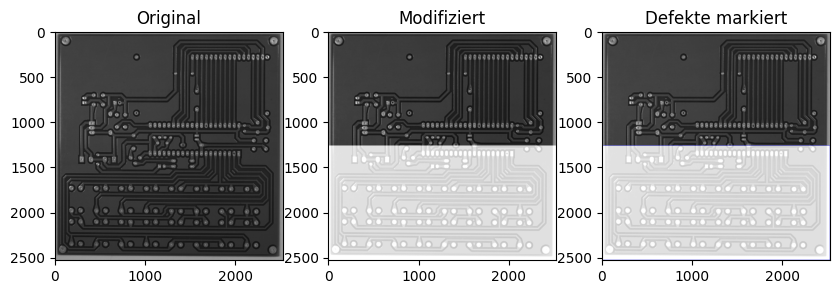

❌ Fehler beim Verbinden zum Stream: HTTPConnectionPool(host='10.108.64.10', port=5020): Read timed out.


In [4]:
import requests
import json
import os
from datetime import datetime
import cv2
import matplotlib.pyplot as plt

# Konfiguration
STREAM_URL = "http://10.108.64.10:5020/api/stream"
IMAGE_SAVE_PATH = "downloaded_images"
PROCESSED_IMAGE_PATH = "processed_images"

# Sicherstellen, dass die Verzeichnisse existieren
os.makedirs(IMAGE_SAVE_PATH, exist_ok=True)
os.makedirs(PROCESSED_IMAGE_PATH, exist_ok=True)


def download_image(image_url, filename):
    """Lädt ein Bild von der gegebenen URL herunter und speichert es."""
    try:
        response = requests.get(image_url, stream=True)
        if response.status_code == 200:
            save_path = os.path.join(IMAGE_SAVE_PATH, filename)
            with open(save_path, "wb") as file:
                for chunk in response.iter_content(1024):
                    file.write(chunk)
            print(f"✅ Bild gespeichert: {save_path}")
            return save_path
        else:
            print(f"⚠️ Fehler beim Abrufen des Bildes: {response.status_code}")
    except Exception as e:
        print(f"❌ Fehler beim Herunterladen des Bildes: {e}")
    return None


def detect_defects(original_path, modified_path, filename):
    """Vergleicht das Original- mit dem Modifiziert-Bild und markiert Defekte."""
    original = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
    modified = cv2.imread(modified_path, cv2.IMREAD_GRAYSCALE)

    if original is None or modified is None:
        print("❌ Fehler beim Laden der Bilder für die Defekterkennung.")
        return

    # Bildgrößen anpassen
    modified = cv2.resize(modified, (original.shape[1], original.shape[0]))

    # Differenz berechnen
    diff = cv2.absdiff(original, modified)
    _, thresh = cv2.threshold(diff, 50, 255, cv2.THRESH_BINARY)

    # Konturen finden
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Defekte markieren
    result = cv2.cvtColor(modified, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(result, contours, -1, (0, 0, 255), 2)

    # Speichern & Anzeigen
    result_path = os.path.join(PROCESSED_IMAGE_PATH, f"processed_{filename}")
    cv2.imwrite(result_path, result)
    print(f"📌 Defekte markiert: {result_path}")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1), plt.imshow(original, cmap='gray'), plt.title('Original')
    plt.subplot(1, 3, 2), plt.imshow(modified, cmap='gray'), plt.title('Modifiziert')
    plt.subplot(1, 3, 3), plt.imshow(result), plt.title('Defekte markiert')
    plt.show()


def stream_json():
    """Liest kontinuierlich den JSON-Datenstrom aus SSE und lädt Bilder herunter."""
    try:
        print(f"🌐 Verbinde mit {STREAM_URL}...")
        with requests.get(STREAM_URL, stream=True, timeout=10) as response:
            print(f"📡 Statuscode: {response.status_code}")

            if response.status_code != 200:
                print(f"⚠️ Fehler: Server antwortet mit {response.status_code}")
                return

            for line in response.iter_lines():
                if not line or not line.strip():
                    continue  # Leere Zeilen ignorieren

                line = line.decode("utf-8").strip()

                if line.startswith("data:"):
                    line = line[5:].strip()  # "data:" entfernen

                    try:
                        data = json.loads(line)
                        print(f"📥 Empfangenes JSON: {data}")

                        original_url = data.get("original")
                        modified_url = data.get("modified")
                        filename = data.get("filename", "image.jpg")

                        if original_url and modified_url:
                            print(f"🔗 Original-Bild-URL: {original_url}")
                            print(f"🔗 Modifiziertes Bild-URL: {modified_url}")

                            original_path = download_image(original_url, f"original_{filename}")
                            modified_path = download_image(modified_url, f"modified_{filename}")

                            if original_path and modified_path:
                                detect_defects(original_path, modified_path, filename)

                    except json.JSONDecodeError as e:
                        print(f"❌ Fehler beim Dekodieren von JSON: {e}")

    except requests.RequestException as e:
        print(f"❌ Fehler beim Verbinden zum Stream: {e}")


if __name__ == "__main__":
    print("🚀 Starte JSON-Stream-Verarbeitung...")
    stream_json()

In [7]:
pip
install
opencv - python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 3.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
